In [1]:
import os
import datetime
import pandas as pd
import plotly.express as px
import streamlit as st

In [2]:
df = pd.read_csv('/Users/Andrew/Documents/GitHub/streamlit_data_vis/vehicle_crashes_cleaned.csv', low_memory=False)

In [3]:
df.tail()

,date,time,zip_code,number_injured,number_killed,factor_vehicle_1,factor_vehicle_2,vehicle_1_type,vehicle_2_type
759093,5/22/2023,0:40,10453,0.0,0.0,driver inexperience,other vehicular,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
759094,5/19/2023,15:00,11212,1.0,0.0,unspecified,unspecified,Sedan,Bike
759095,4/26/2023,9:00,10461,1.0,0.0,driver inattention/distraction,unspecified,Sedan,Sedan
759096,5/22/2023,14:57,10468,0.0,0.0,driver inattention/distraction,unspecified,Sedan,Station Wagon/Sport Utility Vehicle
759097,5/22/2023,8:15,11207,4.0,0.0,failure to yield right-of-way,unspecified,Station Wagon/Sport Utility Vehicle,Sedan


In [4]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [5]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759098 entries, 0 to 759097
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              759098 non-null  datetime64[ns]
 1   time              759098 non-null  datetime64[ns]
 2   zip_code          759098 non-null  object        
 3   number_injured    759098 non-null  float64       
 4   number_killed     759098 non-null  float64       
 5   factor_vehicle_1  759098 non-null  object        
 6   factor_vehicle_2  746491 non-null  object        
 7   vehicle_1_type    759098 non-null  object        
 8   vehicle_2_type    759098 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 52.1+ MB


In [7]:
def hr_func(ts):
    return ts.hour

In [8]:
df['hour'] = df['time'].apply(hr_func)

In [9]:
df['injured+killed'] = df['number_injured'] + df['number_killed']

,date,time,zip_code,number_injured,number_killed,factor_vehicle_1,factor_vehicle_2,vehicle_1_type,vehicle_2_type,hour,injured+killed
0,2021-12-14,1900-01-01 08:17:00,10475.0,2.0,0.0,unspecified,unspecified,Sedan,Sedan,8,2.0
1,2021-12-14,1900-01-01 14:58:00,10017.0,0.0,0.0,passing too closely,unspecified,Sedan,Station Wagon/Sport Utility Vehicle,14,0.0
2,2021-12-14,1900-01-01 16:50:00,11413.0,0.0,0.0,turning improperly,unspecified,Sedan,Station Wagon/Sport Utility Vehicle,16,0.0
3,2021-12-14,1900-01-01 23:10:00,11434.0,2.0,0.0,reaction to uninvolved vehicle,unspecified,Sedan,Sedan,23,2.0
4,2021-12-14,1900-01-01 17:58:00,11217.0,0.0,0.0,passing too closely,unspecified,Tanker,Station Wagon/Sport Utility Vehicle,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...
759093,2023-05-22,1900-01-01 00:40:00,10453.0,0.0,0.0,driver inexperience,other vehicular,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,0.0
759094,2023-05-19,1900-01-01 15:00:00,11212.0,1.0,0.0,unspecified,unspecified,Sedan,Bike,15,1.0
759095,2023-04-26,1900-01-01 09:00:00,10461.0,1.0,0.0,driver inattention/distraction,unspecified,Sedan,Sedan,9,1.0
759096,2023-05-22,1900-01-01 14:57:00,10468.0,0.0,0.0,driver inattention/distraction,unspecified,Sedan,Station Wagon/Sport Utility Vehicle,14,0.0


<Axes: title={'center': 'People Injured or Killed By Hour'}, xlabel='Time of Day', ylabel='People Injured or Killed'>

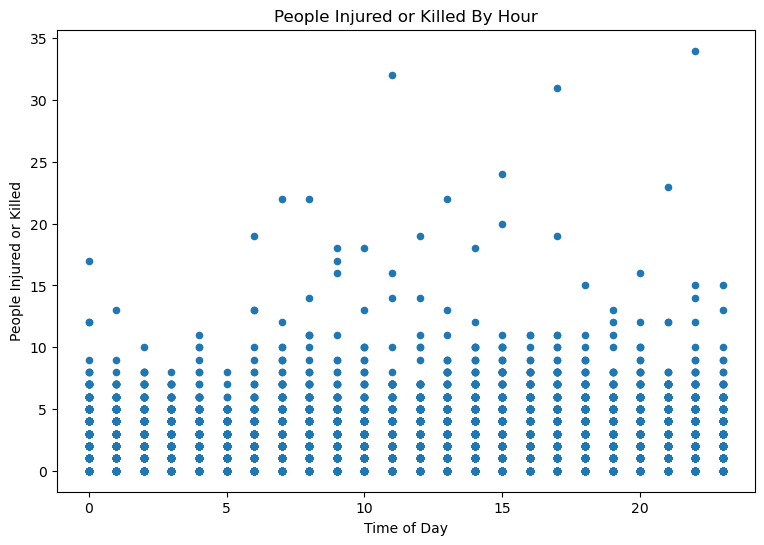

In [35]:
df.plot(kind='scatter', figsize=[9, 6], x='hour', y='injured+killed', 
                          title="People Injured or Killed By Hour", xlabel='Time of Day', ylabel='People Injured or Killed')

In [11]:
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')

<Axes: title={'center': 'Frequency of Accidents By Zip Code'}, ylabel='Frequency'>

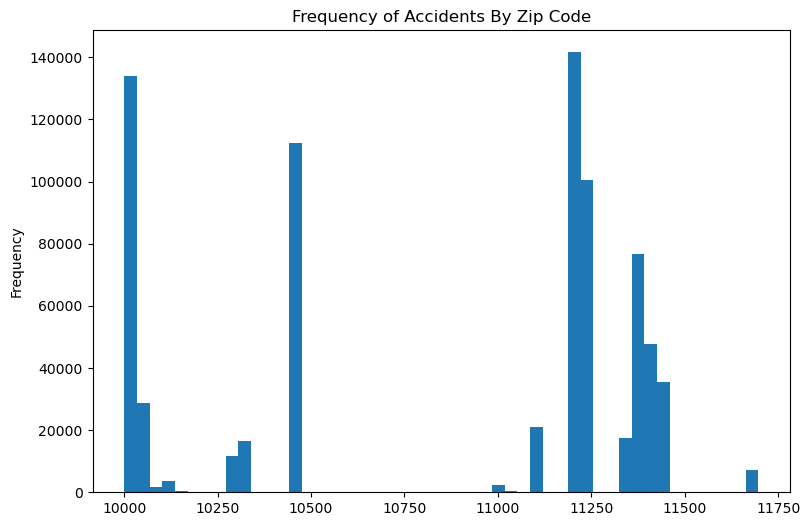

In [33]:
df['zip_code'].plot(kind='hist', figsize=[9, 6], x='zip_code', bins=50, 
                          title="Frequency of Accidents By Zip Code", xlabel='Zipcode')

<Axes: title={'center': 'Frequency of Number of People Injured in Accident'}, ylabel='Frequency'>

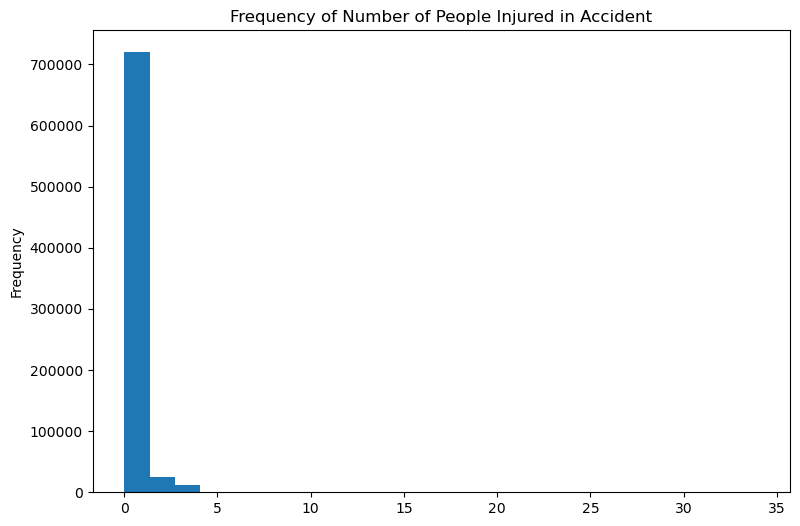

In [13]:
df['number_injured'].plot(kind='hist', figsize=[9, 6], x='number_injured', bins=25, 
                          title="Frequency of Number of People Injured in Accident")

In [14]:
injured_or_killed_only = df[(df['number_injured'] > 0) | (df['number_killed'] > 0)]

In [15]:
injured_or_killed_only_grouped_by_factor_1 = injured_or_killed_only.groupby('factor_vehicle_1')['date'].count().reset_index()

In [16]:
injured_or_killed_only_grouped_by_factor_1.columns=['factor_name', 'factor_1_count']

In [17]:
injured_or_killed_only_grouped_by_factor_2 = injured_or_killed_only.groupby('factor_vehicle_2')['date'].count().reset_index()

In [18]:
injured_or_killed_only_grouped_by_factor_2.columns=['factor_name', 'factor_2_count']

In [19]:
inj_or_killed_combined = injured_or_killed_only_grouped_by_factor_1.merge(injured_or_killed_only_grouped_by_factor_2, on='factor_name', how='outer')

In [20]:
inj_or_killed_combined['factor_2_count']=inj_or_killed_combined['factor_2_count'].fillna(0)

In [21]:
inj_or_killed_combined['count_total'] = inj_or_killed_combined['factor_1_count'] + inj_or_killed_combined['factor_2_count']

In [22]:
inj_or_killed_combined

,factor_name,factor_1_count,factor_2_count,count_total
0,accelerator defective,120,5.0,125.0
1,aggressive driving/road rage,903,129.0,1032.0
2,alcohol involvement,2825,210.0,3035.0
3,animals action,58,5.0,63.0
4,backing unsafely,1978,274.0,2252.0
5,brakes defective,905,50.0,955.0
6,cell phone (hand-held),88,14.0,102.0
7,cell phone (hands-free),14,3.0,17.0
8,driver inattention/distraction,36931,10948.0,47879.0
9,driver inexperience,2464,632.0,3096.0
